# Harmonic oscillator

In [1]:
import sympy
sympy.init_printing()
from IPython.display import display
import numpy
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, './code')

from gauss_legendre import gauss_legendre
from evaluate_functional import evaluate_functional

In [2]:
# state vector (symbolic)
q = sympy.Symbol('q')
p = sympy.Symbol('p')
x = [q, p]

# structure matrix
J = sympy.Matrix([[0, 1],
                  [-1, 0]])

# physical parameters of Hamiltonian function
# (system mass and spring stiffness)
m = sympy.Symbol('m')
k = sympy.Symbol('k')
params = {
    m: 0.1,
    k: 3.0,
}

# Hamiltonian function
H = sympy.Rational(1,2) * p * 1/m * p + sympy.Rational(1, 2) * q * k * q

# storage efforts
dH = sympy.Matrix([H.diff(x_i) for x_i in x])

# time evolution
xdot = J @ dH

# initial condition
x_0 = numpy.array([numpy.pi/6, 0.0])

# duration of simulation in seconds
t_f = 30.0

# time step in seconds
dt = 5e-2

# order of collocation polynomial
s = 2

In [3]:
# run the simulation
%time time, solution = gauss_legendre(x, xdot, x_0, t_f, dt, s=s, params=params)

CPU times: user 212 ms, sys: 3.56 ms, total: 215 ms
Wall time: 215 ms


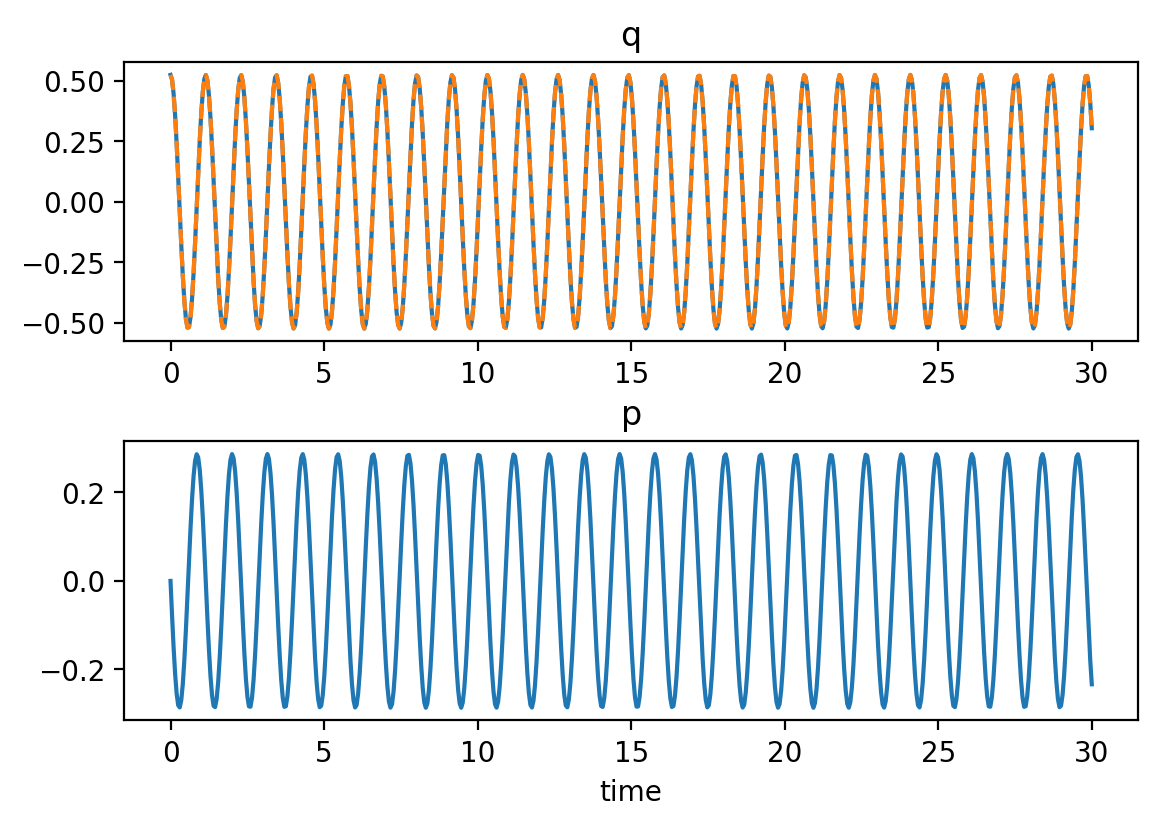

In [9]:
fig, ax = plt.subplots(nrows=2, dpi=200)
fig.tight_layout(pad=1.5)

# upper plot shows q over t
ax[0].set_title("q")
ax[0].plot(time, solution[:, 0])

# plot analytical solution for q in dashed
ω = numpy.sqrt(params[k] / params[m])
ax[0].plot(time, solution[0,0]*numpy.cos(time*ω), '--')

# lower plot shows p over t
ax[1].set_title("p")
ax[1].plot(time, solution[:, 1])
ax[1].set_xlabel("time");

In [10]:
# relative error of energy conservation
energy = evaluate_functional(x, H, solution, params=params)
abs(energy[0] - energy[-1]) / energy[0]